## Introduction:

The retail industry has become increasingly competitive over the years, with retailers attempting to gain a market advantage. Understanding customer behavior and preferences, which can be obtained through customer segmentation analysis, is one way to accomplish this. We will use the "Online Retail" dataset in this analysis, which can be found at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Online+Retail+II), the dataset has 8 columns and 478769 rows. The dataset includes six categorical features (Invoice, StockCode, Description, InvoiceDate, Customer, and Country), as well as two numerical features (Quantity and Price).

We will be using unsupervised learning methods to perform customer segmentation analysis on this dataset. The goal of this analysis is to group customers into different segments based on their purchase history, which will provide insights into their behavior and preferences. By doing so, we can develop targeted marketing strategies that are tailored to each customer segment, thus increasing customer satisfaction and loyalty.

In this notebook, we will be exploring the "Online Retail" dataset, performing data cleaning and preprocessing, and applying unsupervised learning methods to perform customer segmentation analysis. We will also be presenting our findings and insights in a clear and concise manner to facilitate decision-making for retail stakeholders.

## Unsupervised Learning Problem:

For this project, the unsupervised learning problem is to perform customer segmentation analysis on the online retail dataset. Customer segmentation is a common technique used in marketing to divide customers into groups based on their behavior, interests, and demographics. The goal is to identify patterns in customer behavior, such as their purchasing habits, to better understand their needs and preferences. In this case, we will use unsupervised learning methods to identify clusters of customers based on their purchasing behavior, which can be used to develop targeted marketing strategies and improve customer satisfaction.

## Exploratory Data Analysis (EDA):

Based on the exploratory data analysis (EDA), the dataset contained 478769 rows and 8 columns. After inspecting the dataset and checking basic statistics, it was observed that there were some missing values which were dropped. To facilitate modeling, new features such as customer ID, total spending, purchasing frequency, unique items purchased, and time since last purchase were created. The dataframe was then grouped by customers to reduce its size, and customer behavior was visualized using various plots. Outlier analysis was performed and outliers were removed to prepare the data for modeling. The EDA helped in identifying the factors or features that were important in customer segmentation and in understanding the data distribution, correlations between different features, and the need for data transformation and cleaning.

### Dataset Inspection and Basic Statistics
We begin by importing the necessary libraries and reading in the dataset. Let's also take a look at the basic statistics of the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [2]:
df = pd.read_excel("online_retail_II.xlsx")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

After inspecting the dataset, we notice that there are some missing values. We can drop them using the dropna() function:

In [8]:
df.dropna(subset=['Customer ID'], inplace=True)

### Feature Engineering
The current features in the dataset are not very useful for modeling. Therefore, we will create some new features that could be more informative.

To reduce the size of the dataset, we will group customers together. This will also help in our analysis of customer behavior.

In [9]:
df['Total'] = df['Quantity']*df['Price']

In [10]:
cust_spending = df.groupby('Customer ID')['Total'].sum()
cust_spending = cust_spending.reset_index()
cust_spending

,Customer ID,Total
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93
...,...,...
4378,18283.0,641.77
4379,18284.0,436.68
4380,18285.0,427.00
4381,18286.0,1188.43


In [11]:
cust_freq = df.groupby('Customer ID')['Invoice'].count()
cust_freq = cust_freq.reset_index()
cust_freq

,Customer ID,Invoice
0,12346.0,46
1,12347.0,71
2,12348.0,20
3,12349.0,107
4,12351.0,21
...,...,...
4378,18283.0,230
4379,18284.0,29
4380,18285.0,12
4381,18286.0,70


In [12]:
cust_items = df.groupby('Customer ID')['StockCode'].nunique()
cust_items = cust_items.reset_index()
cust_items

,Customer ID,StockCode
0,12346.0,29
1,12347.0,70
2,12348.0,20
3,12349.0,92
4,12351.0,21
...,...,...
4378,18283.0,158
4379,18284.0,28
4380,18285.0,12
4381,18286.0,67


In [13]:
df = df.sort_values(by=['Customer ID', 'InvoiceDate'])
df['time_between_purchases'] = df.groupby('Customer ID')['InvoiceDate'].diff()
df['time_between_purchases'] = pd.to_timedelta(df['time_between_purchases'])
df['time_between_in_hours'] = df['time_between_purchases'].dt.total_seconds()/3600

cust_time = df.groupby('Customer ID')['time_between_in_hours'].mean()
cust_time = cust_time.reset_index()
cust_time

,Customer ID,time_between_in_hours
0,12346.0,156.977407
1,12347.0,12.694524
2,12348.0,0.000000
3,12349.0,74.222327
4,12351.0,0.000000
...,...,...
4378,18283.0,28.918049
4379,18284.0,1.748810
4380,18285.0,0.000000
4381,18286.0,85.930435


In [14]:
df2 = pd.merge(cust_spending, cust_freq, on='Customer ID')
df2 = pd.merge(df2, cust_items, on='Customer ID')
df2 = pd.merge(df2, cust_time, on='Customer ID')
df2.head()

,Customer ID,Total,Invoice,StockCode,time_between_in_hours
0,12346.0,-64.68,46,29,156.977407
1,12347.0,1323.32,71,70,12.694524
2,12348.0,222.16,20,20,0.000000
3,12349.0,2646.99,107,92,74.222327
4,12351.0,300.93,21,21,0.000000


In [15]:
column_rename = {'Total': 'Total Spending', 'Invoice': 'Purchasing Frequency', 
                 'StockCode': 'Unique Items Purchased', 'time_between_in_hours': 'Time Since Last Purchase'}
df2.rename(columns=column_rename, inplace=True)
df2.head()

,Customer ID,Total Spending,Purchasing Frequency,Unique Items Purchased,Time Since Last Purchase
0,12346.0,-64.68,46,29,156.977407
1,12347.0,1323.32,71,70,12.694524
2,12348.0,222.16,20,20,0.000000
3,12349.0,2646.99,107,92,74.222327
4,12351.0,300.93,21,21,0.000000


We can now visualize the behavior of customers using histograms and barplots.

<AxesSubplot:xlabel='Total Spending', ylabel='Count'>

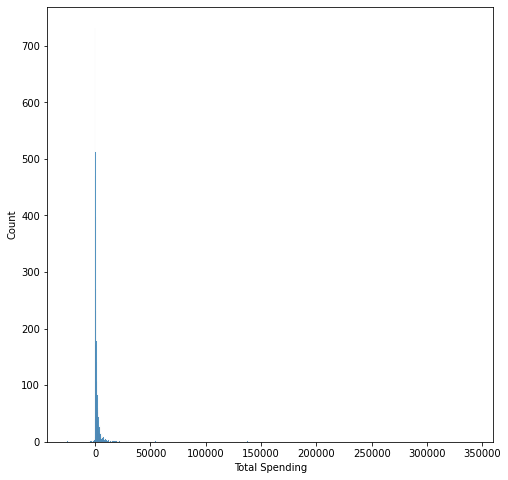

In [16]:
plt.figure(figsize=(8, 8))
sns.histplot(x="Total Spending", data=df2)

<AxesSubplot:xlabel='Purchasing Frequency', ylabel='Count'>

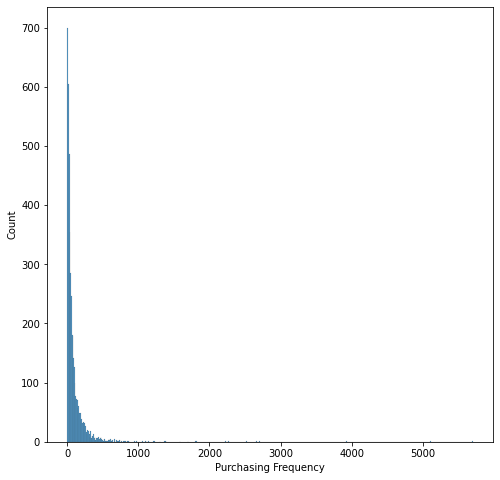

In [17]:
plt.figure(figsize=(8, 8))
sns.histplot(x="Purchasing Frequency", data=df2)

<AxesSubplot:xlabel='Unique Items Purchased', ylabel='Count'>

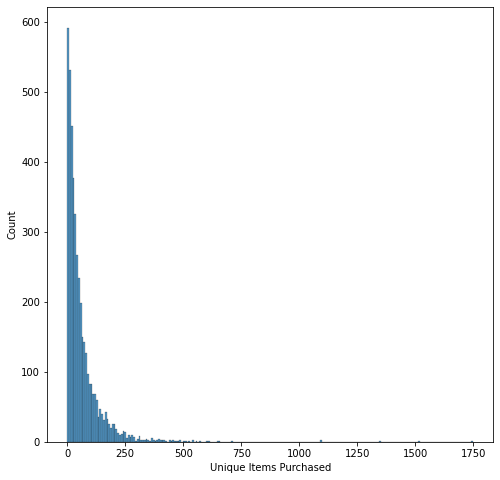

In [18]:
plt.figure(figsize=(8, 8))
sns.histplot(x="Unique Items Purchased", data=df2)

<AxesSubplot:xlabel='Time Since Last Purchase', ylabel='Count'>

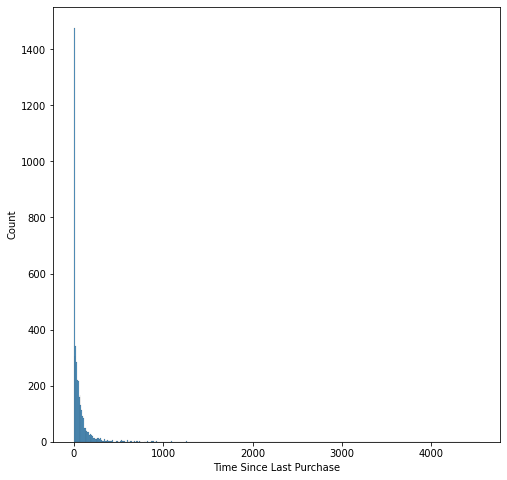

In [19]:
plt.figure(figsize=(8, 8))
sns.histplot(x="Time Since Last Purchase", data=df2)

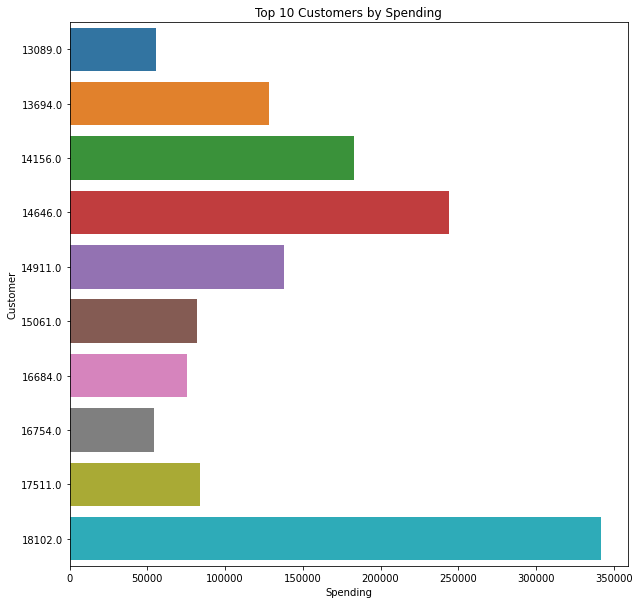

In [20]:
top_10_spend = df2.sort_values(by="Total Spending", ascending=False).head(10)
plt.figure(figsize=(10, 10))
sns.barplot(x=top_10_spend["Total Spending"], y=top_10_spend["Customer ID"], orient="h")
plt.xlabel("Spending")
plt.ylabel("Customer")
plt.title("Top 10 Customers by Spending")
plt.show()

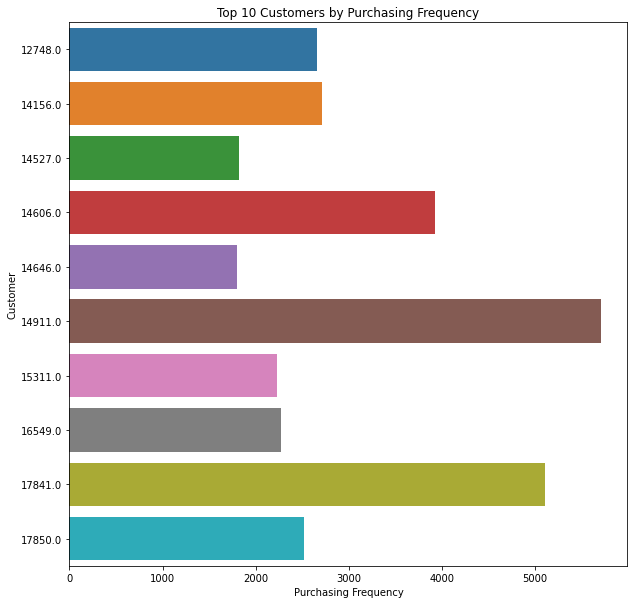

In [21]:
top_10_freq = df2.sort_values(by="Purchasing Frequency", ascending=False).head(10)
plt.figure(figsize=(10, 10))
sns.barplot(x=top_10_freq["Purchasing Frequency"], y=top_10_freq["Customer ID"], orient="h")
plt.xlabel("Purchasing Frequency")
plt.ylabel("Customer")
plt.title("Top 10 Customers by Purchasing Frequency")
plt.show()

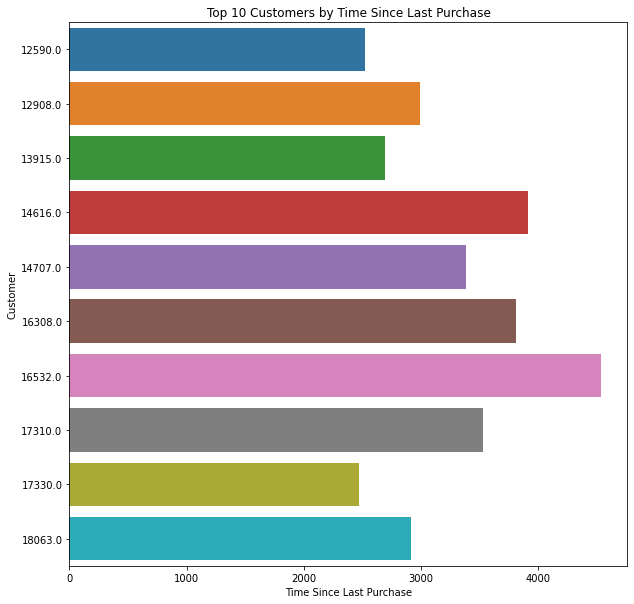

In [22]:
top_10_time = df2.sort_values(by="Time Since Last Purchase", ascending=False).head(10)
plt.figure(figsize=(10, 10))
sns.barplot(x=top_10_time["Time Since Last Purchase"], y=top_10_time["Customer ID"], orient="h")
plt.xlabel("Time Since Last Purchase")
plt.ylabel("Customer")
plt.title("Top 10 Customers by Time Since Last Purchase")
plt.show()

### Outlier Analysis and Removal
We will now perform outlier analysis and remove any outliers that may affect our modeling.

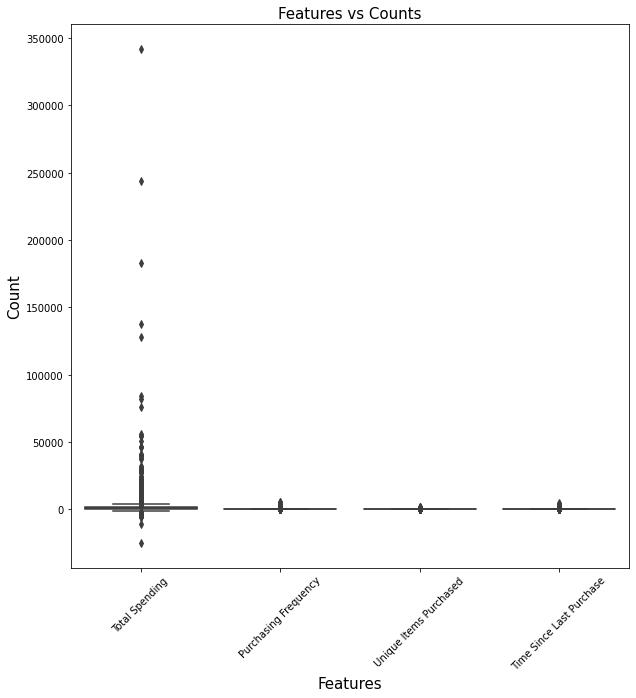

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(df2.iloc[:, 1:])
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Features vs Counts', fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

In [24]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
df2 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df2.head()

,Customer ID,Total Spending,Purchasing Frequency,Unique Items Purchased,Time Since Last Purchase
0,12346.0,-64.68,46,29,156.977407
1,12347.0,1323.32,71,70,12.694524
2,12348.0,222.16,20,20,0.000000
3,12349.0,2646.99,107,92,74.222327
4,12351.0,300.93,21,21,0.000000


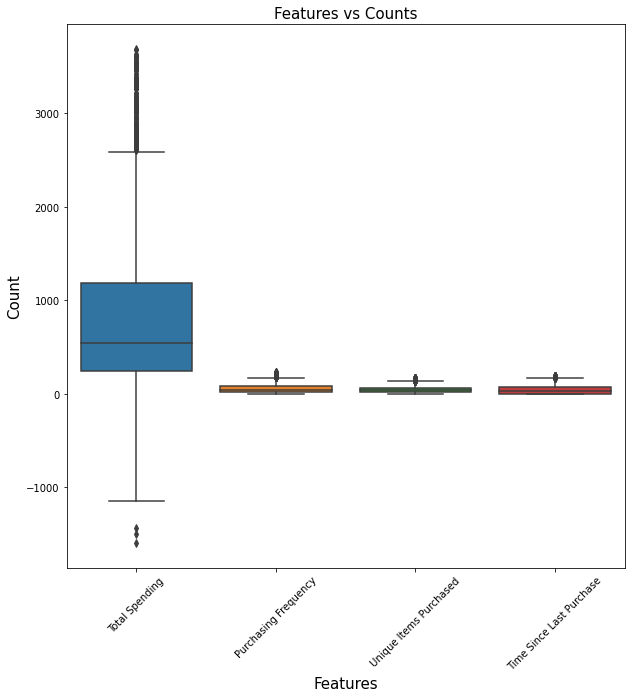

In [25]:
plt.figure(figsize=(10, 10))
sns.boxplot(df2.iloc[:, 1:])
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Features vs Counts', fontsize = 15)
plt.xticks(fontsize = 10, horizontalalignment = 'center', rotation = 45)
plt.yticks(fontsize = 10)
plt.show()

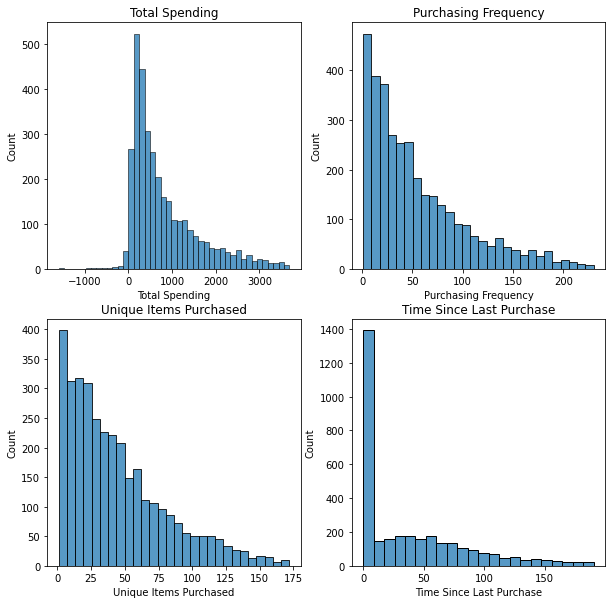

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
sns.histplot(data=df2["Total Spending"], ax=axs[0,0])
sns.histplot(data=df2["Purchasing Frequency"], ax=axs[0,1])
sns.histplot(data=df2["Unique Items Purchased"], ax=axs[1,0])
sns.histplot(data=df2["Time Since Last Purchase"], ax=axs[1,1])

axs[0,0].set_title("Total Spending")
axs[0,1].set_title("Purchasing Frequency")
axs[1,0].set_title("Unique Items Purchased")
axs[1,1].set_title("Time Since Last Purchase")

plt.show()

## Modeling:
In this project, several clustering algorithms were performed to label customers to different clusters, including KMeans Clustering, Hierarchical Clustering, DBSCAN, Gaussian Mixture Model (GMM) and Spectral Clustering. The Elbow Method was used to determine the optimal number of clusters for each algorithm. The Silhouette Score, Calinski-Harabasz Index and Davies-Bouldin Index were used as metrics to evaluate the results of the clustering. These metrics help to assess the quality of clustering, with higher scores indicating better clustering performance. Overall, the clustering results provide valuable insights into the customer segmentation, which can be used to inform business decisions and marketing strategies.

The first step in the modeling process is to prepare the data for analysis. This is done by converting the dataframe to a numpy array and scaling the data using the StandardScaler. Scaling the data is necessary to ensure that all features are on the same scale.

In [53]:
df2 = df2.dropna()
X = np.asarray(df2)
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(3299, 7)

To determine the optimal number of clusters for KMeans clustering, an elbow plot is created. This plot shows the relationship between the number of clusters and the within-cluster sum of squares (WCSS). The elbow point is the point of inflection on the curve, which indicates the optimal number of clusters to use. In this case, the elbow plot suggests that 3 clusters is the optimal number.

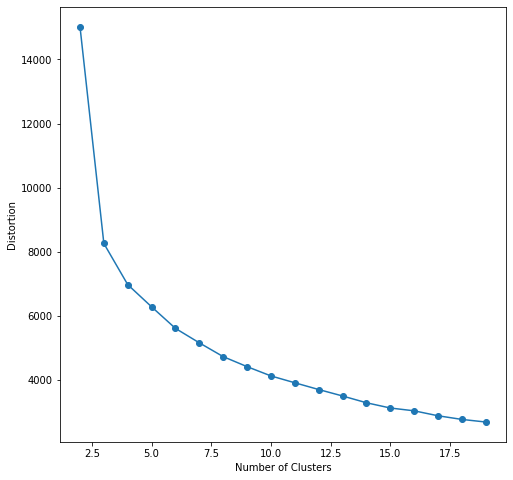

In [54]:
distortions = []
for i in range(2, 20):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [55]:
for k in range(2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    sil_score = metrics.silhouette_score(X, labels)
    ch_score = metrics.calinski_harabasz_score(X, labels)
    db_score = metrics.davies_bouldin_score(X, labels)
    print("Silhouette Score for", k, "Clusters:", sil_score)
    print("Calinski-Harabaz Score for", k, "Clusters:", ch_score)
    print("Davies-Bouldin Score for", k, "Clusters:", db_score)
    print('\n')

Silhouette Score for 2 Clusters: 0.39533301900655765
Calinski-Harabaz Score for 2 Clusters: 1771.483972273437
Davies-Bouldin Score for 2 Clusters: 1.0664282250225465


Silhouette Score for 3 Clusters: 0.4916329341376092
Calinski-Harabaz Score for 3 Clusters: 2961.80910504929
Davies-Bouldin Score for 3 Clusters: 0.8407369341240508


Silhouette Score for 4 Clusters: 0.40008486771601387
Calinski-Harabaz Score for 4 Clusters: 2540.2066071788017
Davies-Bouldin Score for 4 Clusters: 0.8960314180730207


Silhouette Score for 5 Clusters: 0.3598391830827927
Calinski-Harabaz Score for 5 Clusters: 2205.6018414491305
Davies-Bouldin Score for 5 Clusters: 1.1778267934018432


Silhouette Score for 6 Clusters: 0.31997500656376576
Calinski-Harabaz Score for 6 Clusters: 2055.191872420078
Davies-Bouldin Score for 6 Clusters: 1.4019668798403195


Silhouette Score for 7 Clusters: 0.3230347583319601
Calinski-Harabaz Score for 7 Clusters: 1909.4641900093109
Davies-Bouldin Score for 7 Clusters: 1.313601609309

After determining the optimal number of clusters, the KMeans clustering algorithm is used to cluster the data into 3 groups. The Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index are used to evaluate the performance of the clustering algorithm. The resulting clusters are then plotted to visualize the distribution of the data.

In [56]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
kmeans_labels = kmeans.labels_
km_sil_score = metrics.silhouette_score(X, kmeans_labels)
km_ch_score = metrics.calinski_harabasz_score(X, kmeans_labels)
km_db_score = metrics.davies_bouldin_score(X, kmeans_labels)
print("Silhouette Score:", round(km_sil_score,3))
print("Calinski-Harabaz Score:", round(km_ch_score,3))
print("Davies-Bouldin Score:", round(km_db_score,3))

Silhouette Score: 0.492
Calinski-Harabaz Score: 2961.809
Davies-Bouldin Score: 0.841


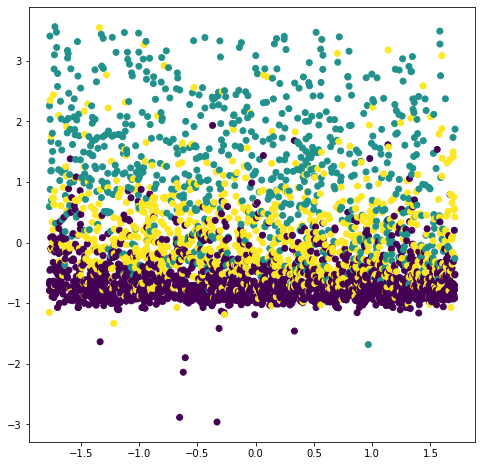

In [57]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=kmeans_labels)

To further explore the characteristics of each cluster, a violin plot is created for each cluster. This plot shows the distribution of spending, purchasing frequency, unique items purchased, and time since last purchase for each cluster. Based on this plot, Cluster 1 represents customers with higher spending, frequent purchases, and a diverse range of items, while Cluster 0 represents customers with a lower spending habit, infrequent purchases, and one-time buyers. Cluster 2 represents customers between the two.

In [58]:
df2['Clusters'] = list(kmeans_labels)

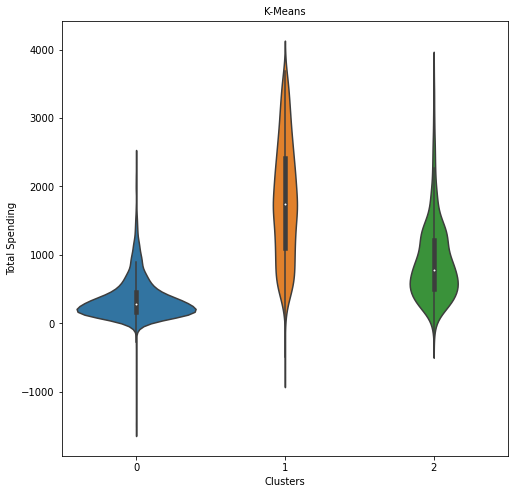

In [59]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters'], y=df2['Total Spending'])
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Total Spending', fontsize = 10)
plt.title('K-Means', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

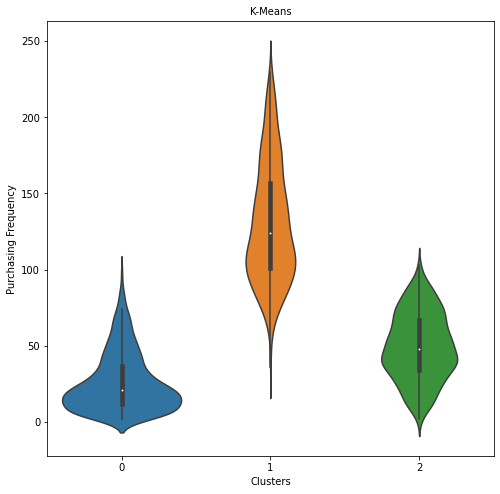

In [60]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters'], y=df2['Purchasing Frequency'])
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Purchasing Frequency', fontsize = 10)
plt.title('K-Means', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

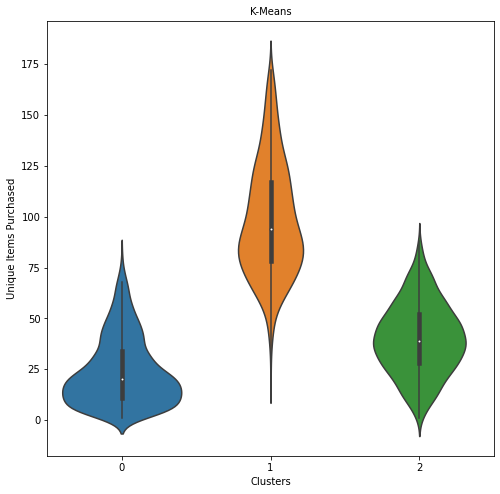

In [61]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters'], y=df2['Unique Items Purchased'])
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Unique Items Purchased', fontsize = 10)
plt.title('K-Means', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

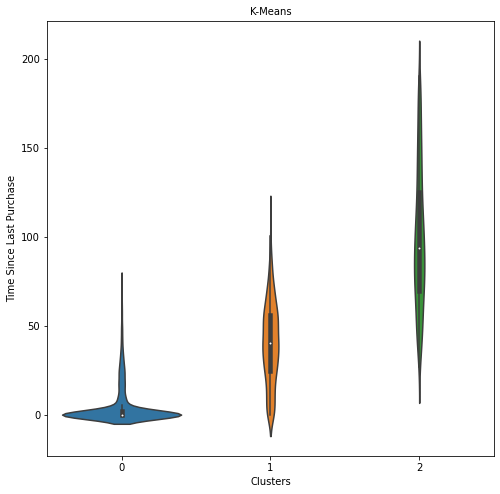

In [62]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters'], y=df2['Time Since Last Purchase'])
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Time Since Last Purchase', fontsize = 10)
plt.title('K-Means', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

Hierarchical clustering is performed using the ward method, and a dendrogram is created to visualize the clustering process. The dendrogram shows how the data is divided into clusters and how the clusters are merged over time.

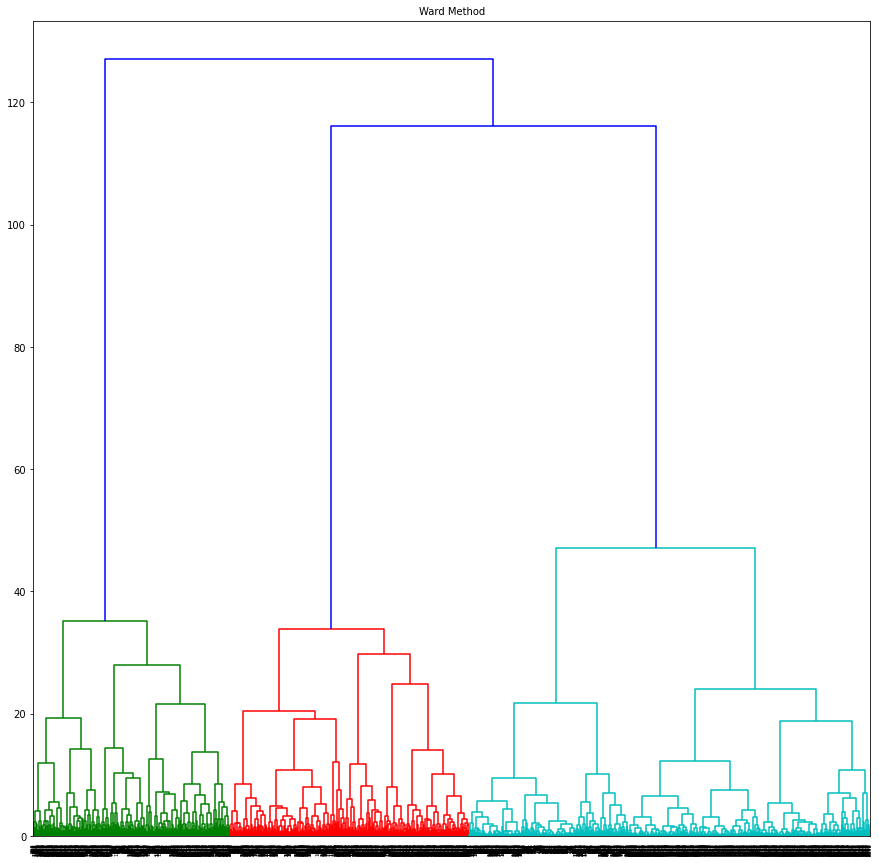

In [63]:
Z = sch.linkage(X, method='ward')
plt.figure(figsize=(15, 15))
sch.dendrogram(Z)
plt.title('Ward Method', fontsize = 10)
plt.show()

Another hierarchical clustering is performed using the complete method, and a dendrogram is created to visualize the clustering process. This dendrogram shows a different clustering pattern than the previous one.

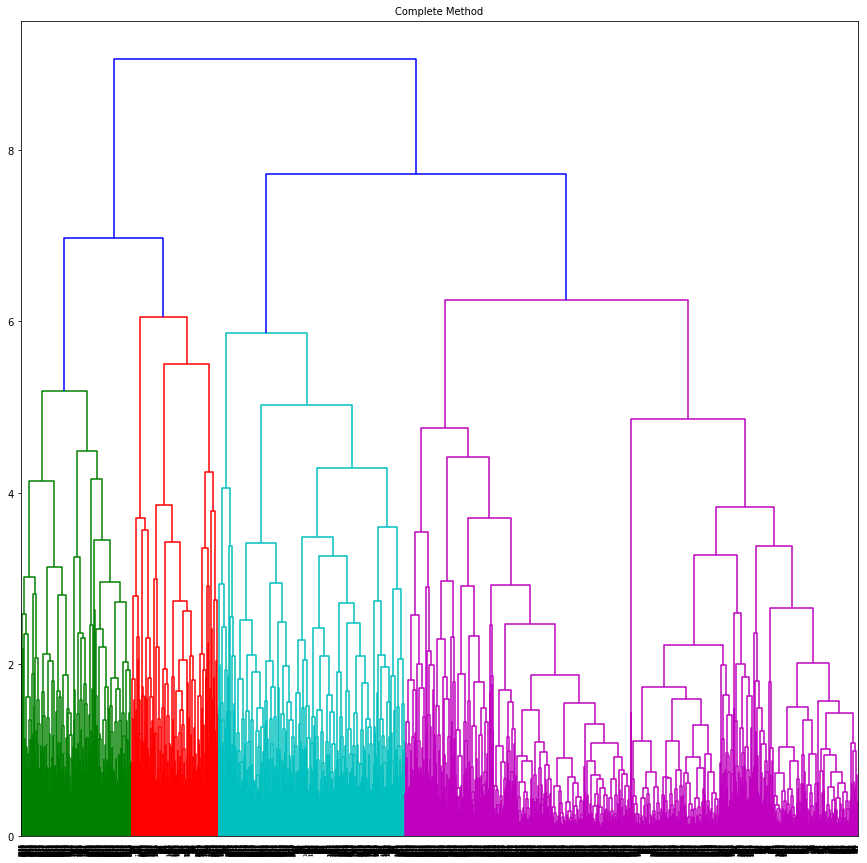

In [64]:
Z = sch.linkage(X, method='complete')
plt.figure(figsize=(15, 15))
plt.title('Complete Method', fontsize = 10)
sch.dendrogram(Z)
plt.show()

The optimum number of clusters for AgglomerativeClustering is determined by evaluating the Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index for different numbers of clusters. This analysis suggests that 3 clusters is the best number.

In [65]:
for k in range(2,20):
    agg_cluster = AgglomerativeClustering(n_clusters=k)
    agg_cluster.fit(X)
    agg_cluster_labels = agg_cluster.labels_
    sil_score = metrics.silhouette_score(X, agg_cluster_labels)
    ch_score = metrics.calinski_harabasz_score(X, agg_cluster_labels)
    db_score = metrics.davies_bouldin_score(X, agg_cluster_labels)
    print("Silhouette Score for", k, "Clusters:", sil_score)
    print("Calinski-Harabaz Score for", k, "Clusters:", ch_score)
    print("Davies-Bouldin Score for", k, "Clusters:", db_score)
    print('\n')

Silhouette Score for 2 Clusters: 0.3952608296287939
Calinski-Harabaz Score for 2 Clusters: 1771.3877637131227
Davies-Bouldin Score for 2 Clusters: 1.065281845431944


Silhouette Score for 3 Clusters: 0.49032025951571623
Calinski-Harabaz Score for 3 Clusters: 2949.5948206383496
Davies-Bouldin Score for 3 Clusters: 0.8474833617457632


Silhouette Score for 4 Clusters: 0.3776818434831815
Calinski-Harabaz Score for 4 Clusters: 2441.87361851977
Davies-Bouldin Score for 4 Clusters: 0.9358647481486011


Silhouette Score for 5 Clusters: 0.33266522010449906
Calinski-Harabaz Score for 5 Clusters: 2080.314751312968
Davies-Bouldin Score for 5 Clusters: 1.2366772431810613


Silhouette Score for 6 Clusters: 0.2844680449563838
Calinski-Harabaz Score for 6 Clusters: 1885.4481950436082
Davies-Bouldin Score for 6 Clusters: 1.5162789972364017


Silhouette Score for 7 Clusters: 0.29597783079879614
Calinski-Harabaz Score for 7 Clusters: 1740.1087616705572
Davies-Bouldin Score for 7 Clusters: 1.413715028101

The AgglomerativeClustering algorithm is then used to cluster the data into 3 groups. The Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index are used to evaluate the performance of the clustering algorithm. The resulting clusters are then plotted to visualize the distribution of the data.

In [66]:
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(X)
agg_cluster_labels = agg_cluster.labels_
hc_sil_score = metrics.silhouette_score(X, agg_cluster_labels)
hc_ch_score = metrics.calinski_harabasz_score(X, agg_cluster_labels)
hc_db_score = metrics.davies_bouldin_score(X, agg_cluster_labels)
print("Silhouette Score:", round(hc_sil_score,3))
print("Calinski-Harabaz Score:", round(hc_ch_score,3))
print("Davies-Bouldin Score:", round(hc_db_score,3))

Silhouette Score: 0.49
Calinski-Harabaz Score: 2949.595
Davies-Bouldin Score: 0.847


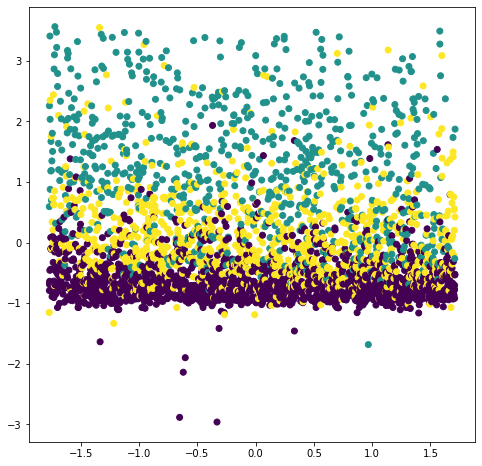

In [67]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:,0], X[:,1], c=agg_cluster_labels)

Similar to K-Means, a violin plot is created for each cluster to visualize the distribution of spending, purchasing frequency, unique items purchased, and time since last purchase for each cluster.

In [68]:
df2['Clusters2'] = list(agg_cluster_labels)

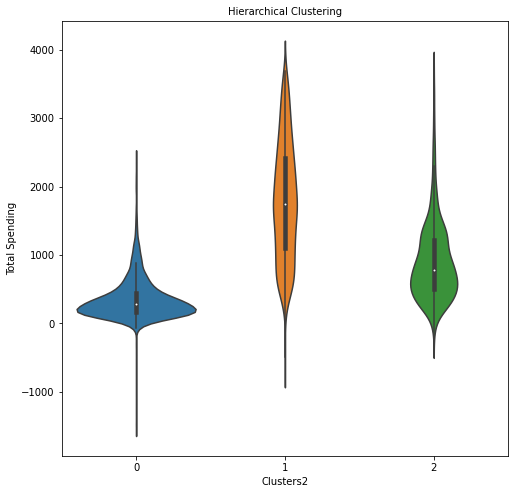

In [69]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters2'], y=df2['Total Spending'])
plt.xlabel('Clusters2', fontsize = 10)
plt.ylabel('Total Spending', fontsize = 10)
plt.title('Hierarchical Clustering', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

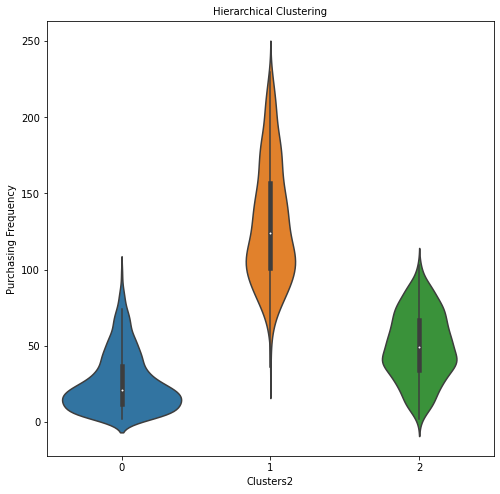

In [70]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters2'], y=df2['Purchasing Frequency'])
plt.xlabel('Clusters2', fontsize = 10)
plt.ylabel('Purchasing Frequency', fontsize = 10)
plt.title('Hierarchical Clustering', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

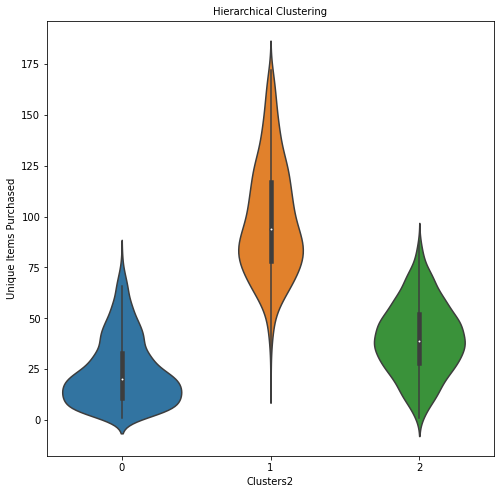

In [71]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters2'], y=df2['Unique Items Purchased'])
plt.xlabel('Clusters2', fontsize = 10)
plt.ylabel('Unique Items Purchased', fontsize = 10)
plt.title('Hierarchical Clustering', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

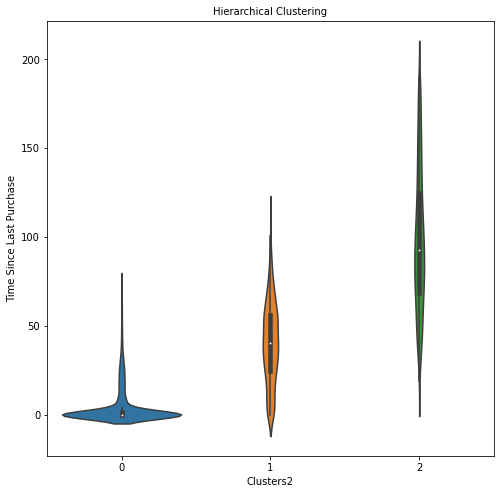

In [72]:
plt.figure(figsize=(8, 8))
sns.violinplot(x=df2['Clusters2'], y=df2['Time Since Last Purchase'])
plt.xlabel('Clusters2', fontsize = 10)
plt.ylabel('Time Since Last Purchase', fontsize = 10)
plt.title('Hierarchical Clustering', fontsize = 10)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

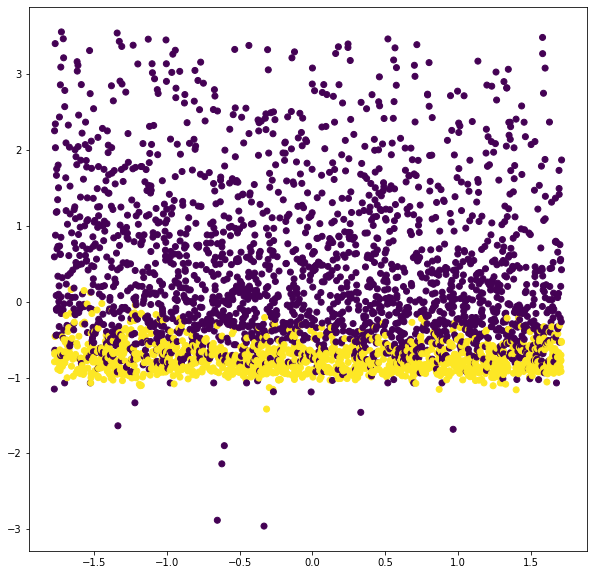

In [73]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan.fit(X)
db_labels = dbscan.labels_
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=db_labels)
plt.show()

DBSCAN is used to cluster the data into groups, and the resulting clusters are plotted to visualize the distribution of the data. The Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index are used to evaluate the performance of the clustering algorithm.

In [74]:
db_sil_score = metrics.silhouette_score(X, db_labels)
db_ch_score = metrics.calinski_harabasz_score(X, db_labels)
db_db_score = metrics.davies_bouldin_score(X, db_labels)
print("Silhouette Score:", round(db_sil_score,3))
print("Calinski-Harabaz Scor:e", round(db_ch_score,3))
print("Davies-Bouldin Score:", round(db_db_score,3))

Silhouette Score: 0.26
Calinski-Harabaz Scor:e 1191.254
Davies-Bouldin Score: 1.288


Gaussian Mixture Model is used to cluster the data into groups, and the resulting clusters are plotted to visualize the distribution of the data. The Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index are used to evaluate the performance of the clustering algorithm.

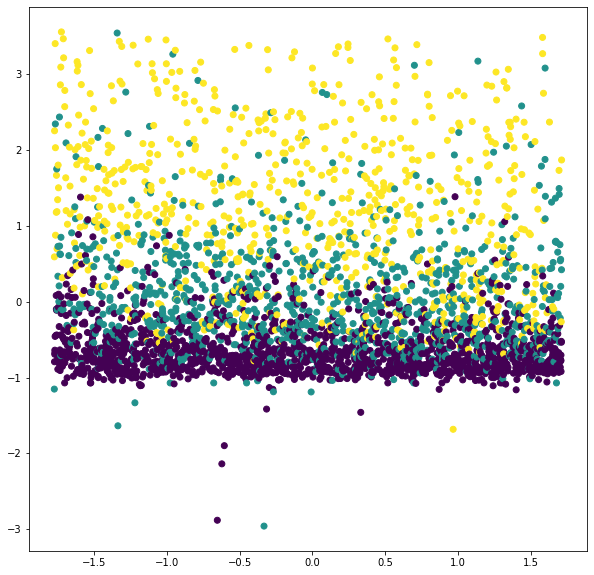

In [75]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
gmm_labels = gmm.predict(X)
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels)
plt.show()

In [76]:
gmm_sil_score = metrics.silhouette_score(X, gmm_labels)
gmm_ch_score = metrics.calinski_harabasz_score(X, gmm_labels)
gmm_db_score = metrics.davies_bouldin_score(X, gmm_labels)
print("Silhouette Score:", round(gmm_sil_score,3))
print("Calinski-Harabaz Score:", round(gmm_ch_score,3))
print("Davies-Bouldin Score:", round(gmm_db_score,3))

Silhouette Score: 0.478
Calinski-Harabaz Score: 2817.973
Davies-Bouldin Score: 0.887


Spectral Clustering is used to cluster the data into groups, and the resulting clusters are plotted to visualize the distribution of the data. The Silhouette Score, Calinski-Harabasz Index, and Davies-Bouldin Index are used to evaluate the performance of the clustering algorithm.

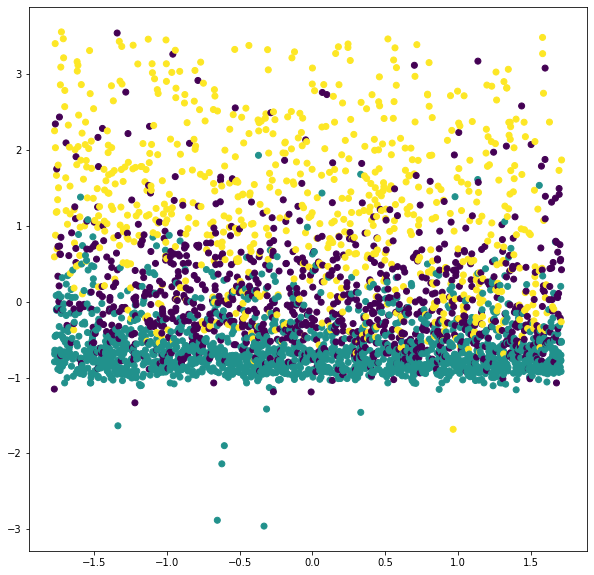

In [77]:
sp_cl = SpectralClustering(n_clusters=3)
sp_cl.fit(X)
sp_cl_labels = sp_cl.fit_predict(X)
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=sp_cl_labels)
plt.show()

In [78]:
sp_cl_sil_score = metrics.silhouette_score(X, db_labels)
sp_cl_ch_score = metrics.calinski_harabasz_score(X, db_labels)
sp_cl_db_score = metrics.davies_bouldin_score(X, db_labels)
print("Silhouette Score:", round(sp_cl_sil_score,3))
print("Calinski-Harabaz Score:", round(sp_cl_ch_score,3))
print("Davies-Bouldin Score:", round(sp_cl_db_score,3))

Silhouette Score: 0.26
Calinski-Harabaz Score: 1191.254
Davies-Bouldin Score: 1.288


Finally, all the models and their scores are summarized in a table for comparison.

In [79]:
scores = {'K-Means':[km_sil_score,km_ch_score,km_db_score],
         'Hierarchical Clustering':[hc_sil_score,hc_ch_score,hc_db_score],
         'DBSCAN':[db_sil_score,db_ch_score,db_db_score],
         'Gaussian Mixture Model':[gmm_sil_score,gmm_ch_score,gmm_db_score],
         'Spectral Clustering':[sp_cl_sil_score,sp_cl_ch_score,sp_cl_db_score]}
df_scores = pd.DataFrame(scores,index=['Silhouette Score','Calinski-Harabasz Index','Davies-Bouldin Index'])
df_scores

,K-Means,Hierarchical Clustering,DBSCAN,Gaussian Mixture Model,Spectral Clustering
Silhouette Score,0.491633,0.490320,0.259569,0.478419,0.259569
Calinski-Harabasz Index,2961.809105,2949.594821,1191.253712,2817.973007,1191.253712
Davies-Bouldin Index,0.840737,0.847483,1.288135,0.887199,1.288135


# Conclusion:

Based on the results of the clustering models performed, we can draw several conclusions about the behavior of the customers in the dataset. The K-Means, Agglomerative Clustering, and Gaussian Mixture Model all resulted in 3 optimal clusters, while the DBSCAN and Spectral Clustering did not perform as well.

Using the silhouette score, Calinski-Harabasz index, and Davies-Bouldin index, we were able to evaluate the performance of each model. The K-Means and Agglomerative Clustering models performed similarly well, with cluster 0 representing higher spending, frequent purchases, and a diverse range of items, cluster 1 representing lower spending habits, infrequent purchases, and one-time buyers, and cluster 2 representing behavior between clusters 0 and 1. The Gaussian Mixture Model also resulted in similar clusters.

Overall, the clustering models were able to provide valuable insights into the behavior of customers in the dataset, and could be used to inform marketing and business strategies. However, further analysis could be performed to improve the models and obtain even more accurate results.